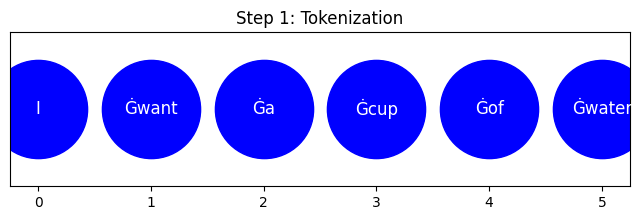

In [4]:
plt.figure(figsize=(8, 2))
plt.scatter(range(len(tokens)), [0]*len(tokens), color='blue', s=500)
for i, token in enumerate(tokens):
    plt.text(i, 0, token, ha='center', va='center', fontsize=12, color='white')
plt.yticks([])
plt.title("Step 1: Tokenization")
plt.show()

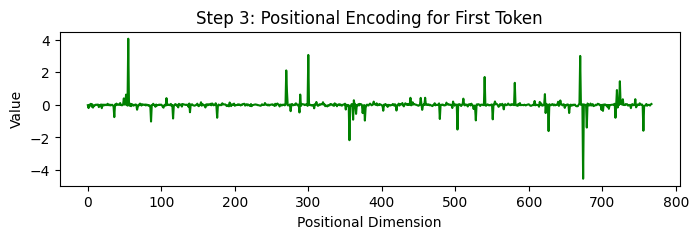

In [6]:
position_encoding = model.transformer.wpe(torch.arange(len(tokens)))
plt.figure(figsize=(8, 2))
plt.plot(position_encoding[0].detach().numpy(), color='green')
plt.title("Step 3: Positional Encoding for First Token")
plt.xlabel("Positional Dimension")
plt.ylabel("Value")
plt.show()


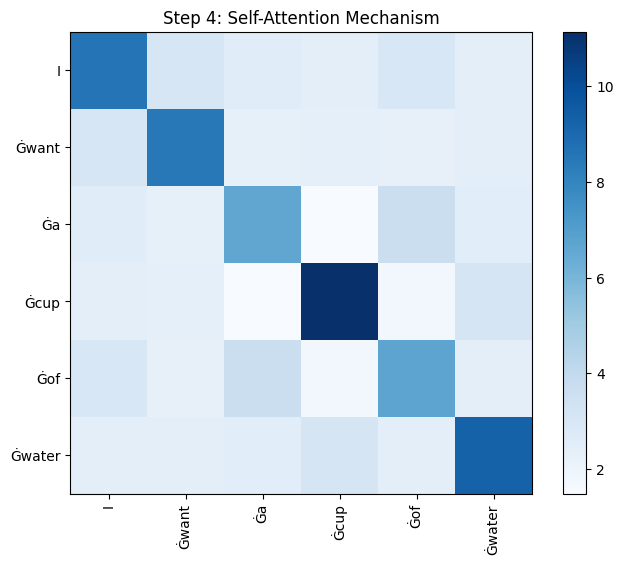

In [7]:
import numpy as np
attention_scores = torch.matmul(embedding_output[0], embedding_output[0].T)
attention_scores = attention_scores.detach().numpy()
plt.figure(figsize=(8, 6))
plt.imshow(attention_scores, cmap='Blues', interpolation='none')
plt.colorbar()
plt.xticks(range(len(tokens)), tokens, rotation=90)
plt.yticks(range(len(tokens)), tokens)
plt.title("Step 4: Self-Attention Mechanism")
plt.show()


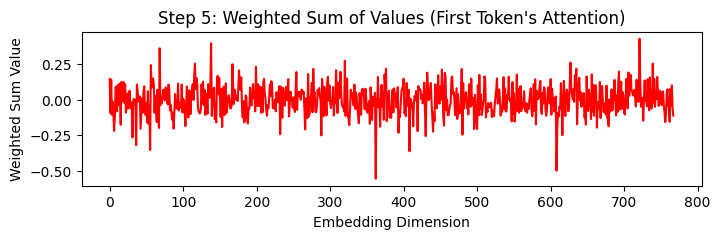

In [8]:
attention_weights = np.exp(attention_scores) / np.sum(np.exp(attention_scores), axis=-1, keepdims=True)
weighted_sum = np.dot(attention_weights, embedding_output[0].detach().numpy())
plt.figure(figsize=(8, 2))
plt.plot(weighted_sum[0], color='red')
plt.title("Step 5: Weighted Sum of Values (First Token's Attention)")
plt.xlabel("Embedding Dimension")
plt.ylabel("Weighted Sum Value")
plt.show()


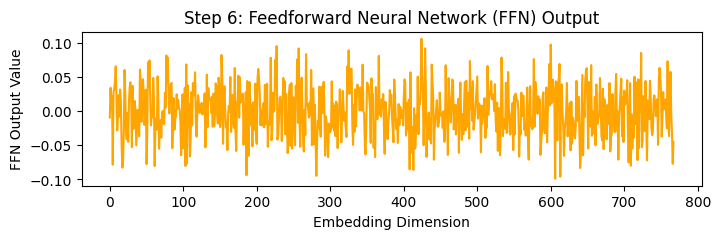

In [9]:
import torch.nn as nn
ffn = nn.Sequential(
    nn.Linear(len(weighted_sum[0]), 512),
    nn.ReLU(),
    nn.Linear(512, len(weighted_sum[0]))
)
ffn_output = ffn(torch.tensor(weighted_sum[0]))
plt.figure(figsize=(8, 2))
plt.plot(ffn_output.detach().numpy(), color='orange')
plt.title("Step 6: Feedforward Neural Network (FFN) Output")
plt.xlabel("Embedding Dimension")
plt.ylabel("FFN Output Value")
plt.show()


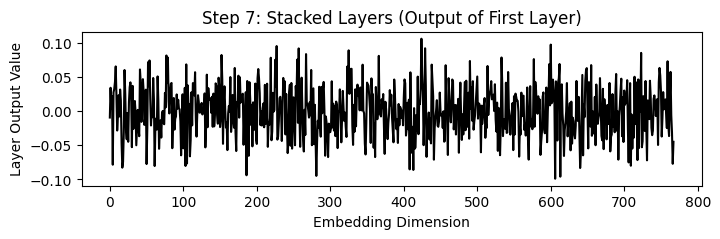

In [10]:
layer_output = ffn_output.detach().numpy()
plt.figure(figsize=(8, 2))
plt.plot(layer_output, color='black')
plt.title("Step 7: Stacked Layers (Output of First Layer)")
plt.xlabel("Embedding Dimension")
plt.ylabel("Layer Output Value")
plt.show()
